# If you like the notebook please upvote it

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import warnings
warnings.filterwarnings('ignore')

# **Loading the datasets**

In [3]:
data = pd.read_csv("PET_PRI_GND_DCUS_NUS_W.csv")
data

,Date,A1,A2,A3,R1,R2,R3,M1,M2,M3,P1,P2,P3,D1
0,01/02/1995,1.127,1.104,1.231,1.079,1.063,1.167,1.170,1.159,1.298,1.272,1.250,1.386,1.104
1,01/09/1995,1.134,1.111,1.232,1.086,1.070,1.169,1.177,1.164,1.300,1.279,1.256,1.387,1.102
2,01/16/1995,1.126,1.102,1.231,1.078,1.062,1.169,1.168,1.155,1.299,1.271,1.249,1.385,1.100
3,01/23/1995,1.132,1.110,1.226,1.083,1.068,1.165,1.177,1.165,1.296,1.277,1.256,1.378,1.095
4,01/30/1995,1.131,1.109,1.221,1.083,1.068,1.162,1.176,1.163,1.291,1.275,1.255,1.370,1.090
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1356,12/28/2020,2.330,2.225,2.535,2.243,2.158,2.423,2.634,2.482,2.858,2.889,2.770,3.031,2.635
1357,01/04/2021,2.336,2.227,2.549,2.249,2.160,2.437,2.639,2.484,2.867,2.895,2.771,3.042,2.640
1358,01/11/2021,2.403,2.298,2.610,2.317,2.232,2.498,2.702,2.550,2.927,2.959,2.839,3.101,2.670
1359,01/18/2021,2.464,2.351,2.688,2.379,2.285,2.579,2.759,2.601,2.995,3.014,2.885,3.166,2.696


# **Saving a copy of the datasets**

In [4]:
data_copy = data.copy()

# **EDA**

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

**lets split the date column**

In [6]:
data['Date'] = pd.to_datetime(data['Date'])
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day

**lets look for a trend in the data**

In [7]:
years = data['Year'].unique()

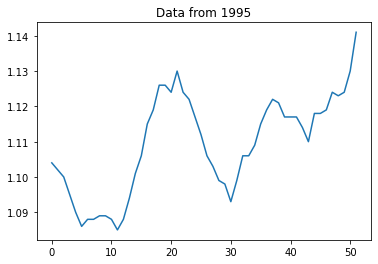

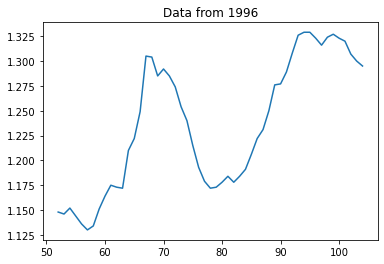

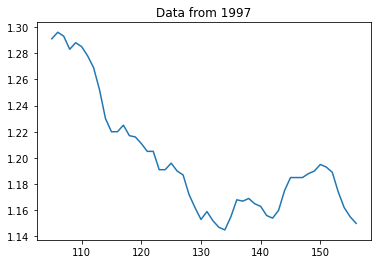

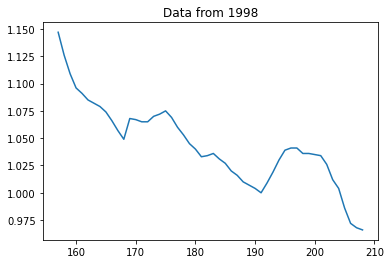

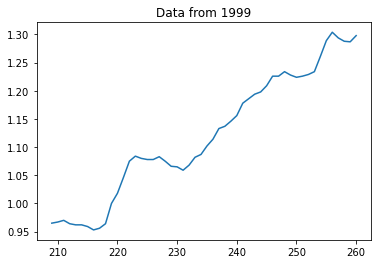

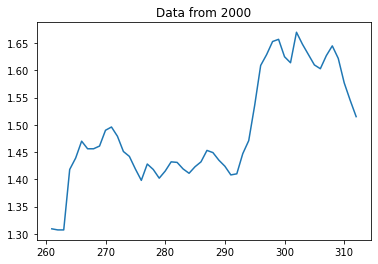

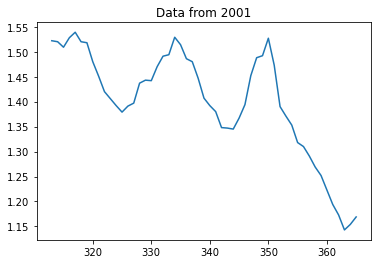

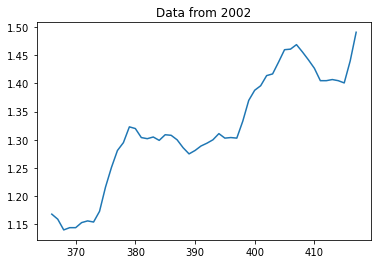

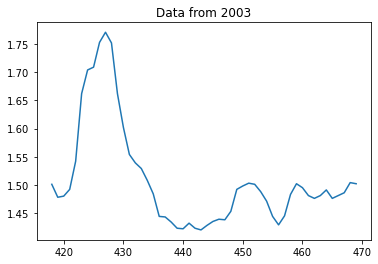

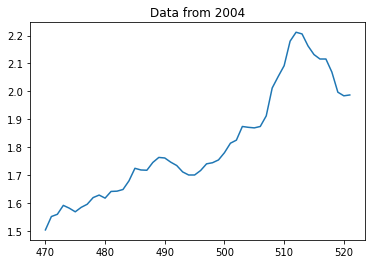

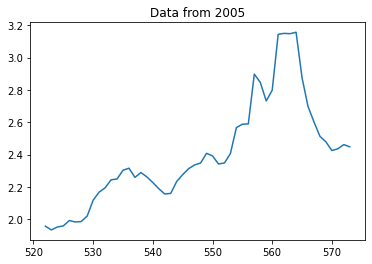

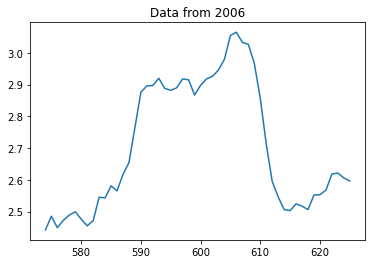

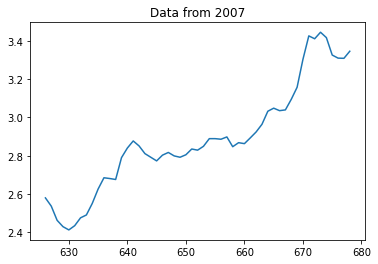

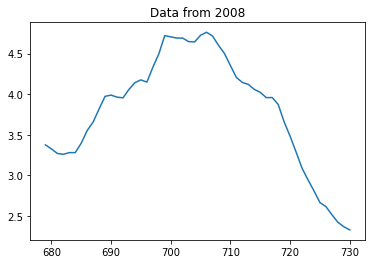

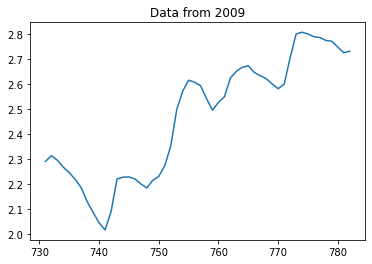

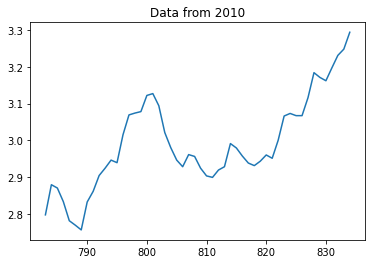

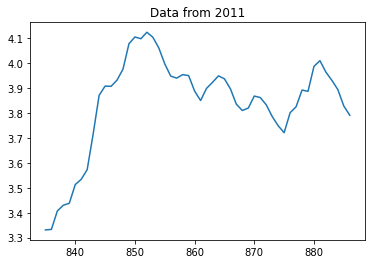

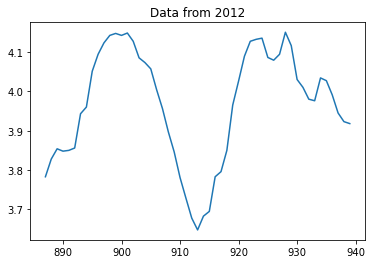

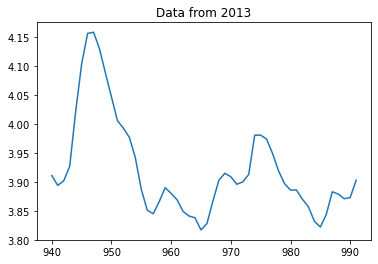

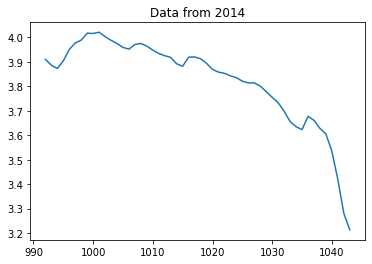

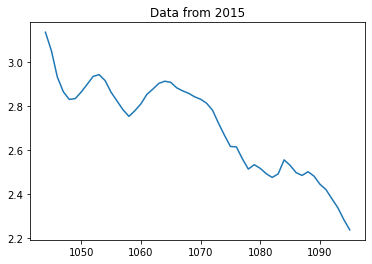

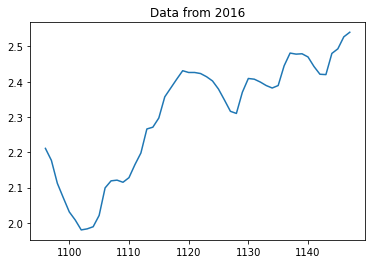

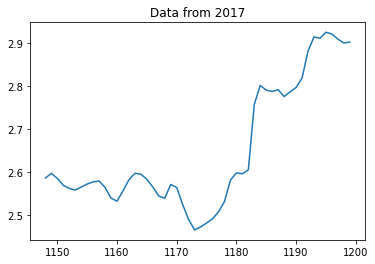

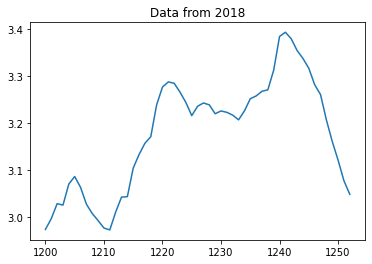

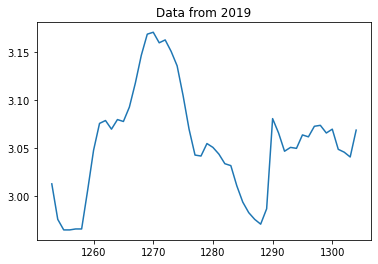

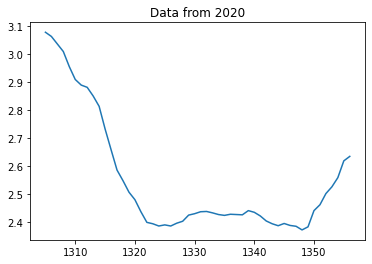

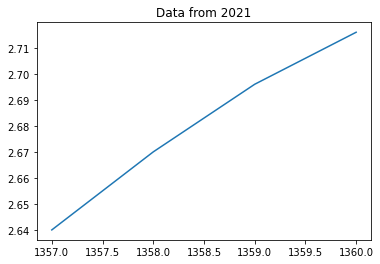

In [8]:
for year in years:
    data_to_plot = data[data['Year'] == year].D1
    plt.title(f'Data from {year}')
    plt.plot(data_to_plot)
    plt.show()

**all cols vs D1**

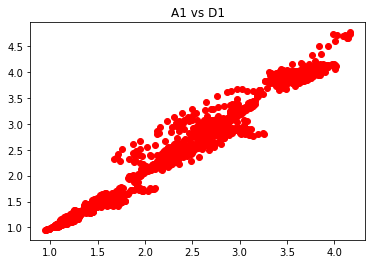

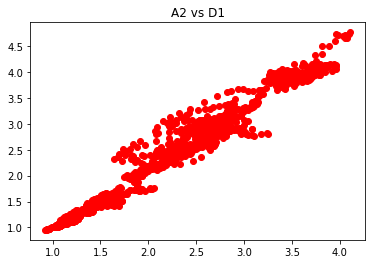

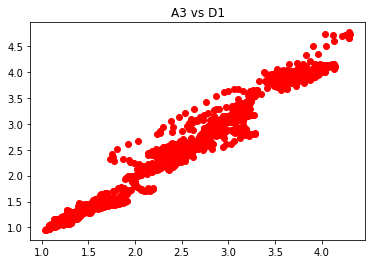

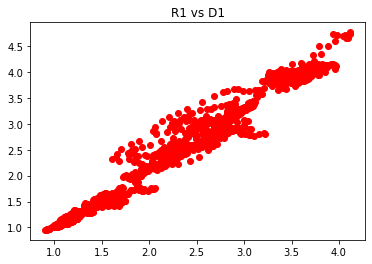

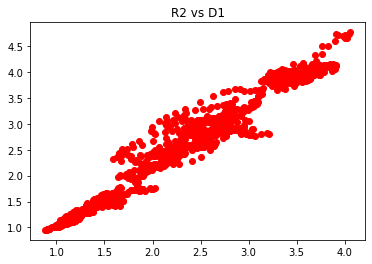

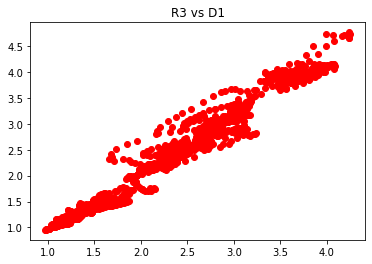

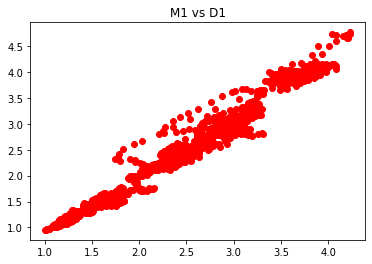

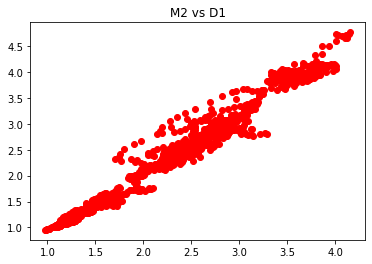

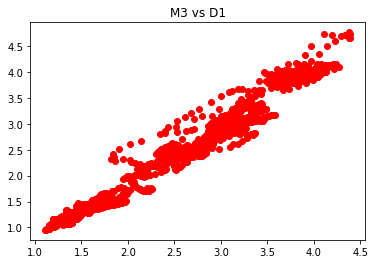

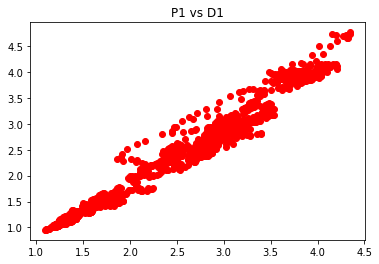

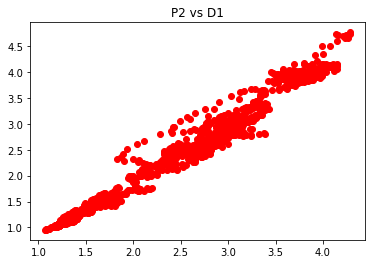

In [9]:
for col in data.columns[1:12]:
    plt.title(f'{col} vs D1')
    plt.scatter(data[col], data['D1'], c='red')
    plt.show()

**distplot of all columns**

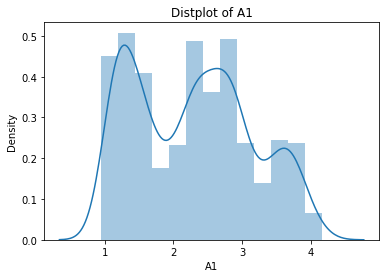

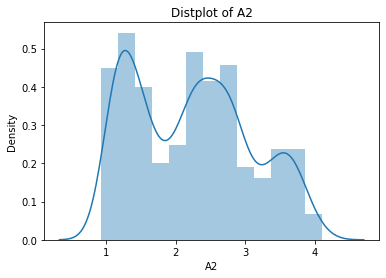

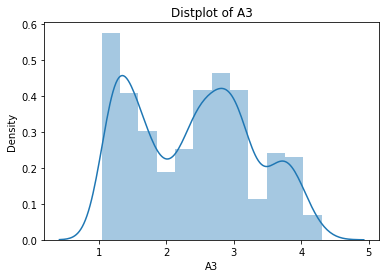

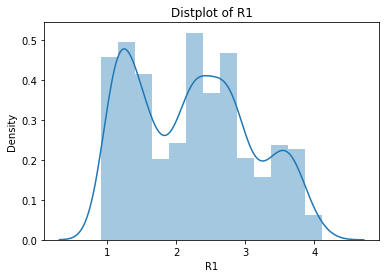

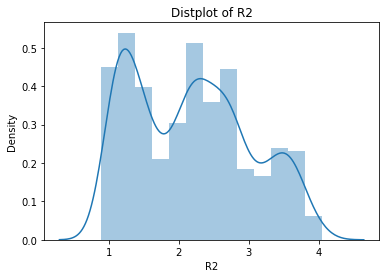

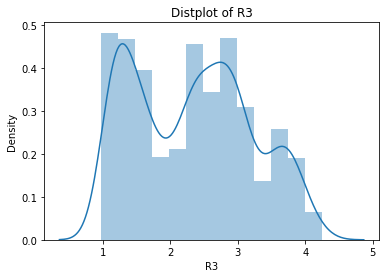

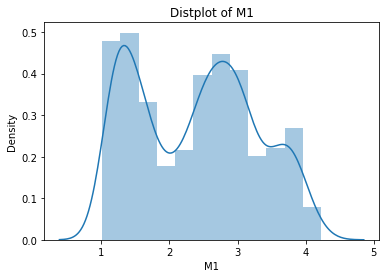

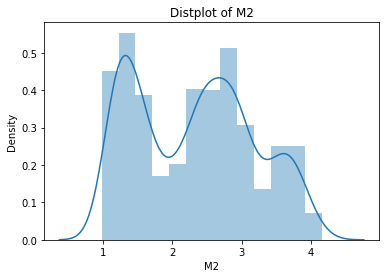

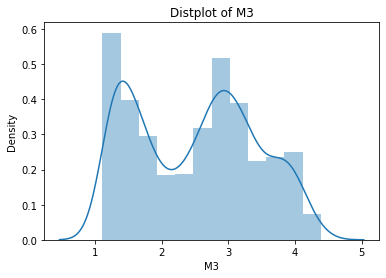

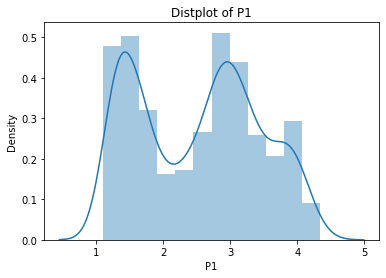

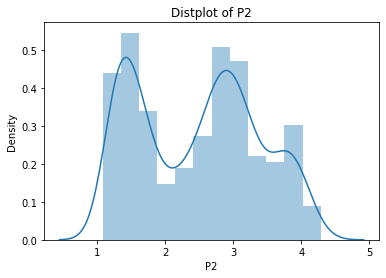

In [10]:
for col in data.columns[1:12]:
    plt.title(f'Distplot of {col}')
    sns.distplot(data[col])
    plt.show()

# **Data processing**

**lets drop the useless columns**

In [11]:
data.drop(['Date', 'Year', 'Month', 'Day'], axis = 1, inplace = True)

**null values?**

In [12]:
data.isnull().sum().any()

False

**detecting outliars**

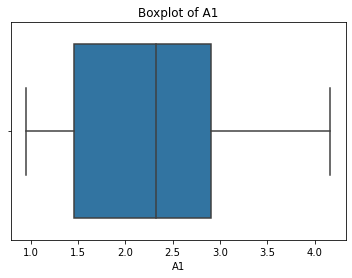

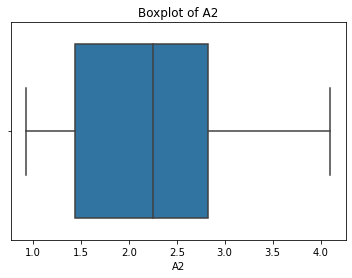

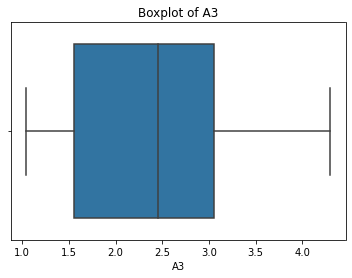

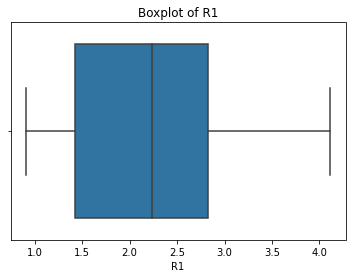

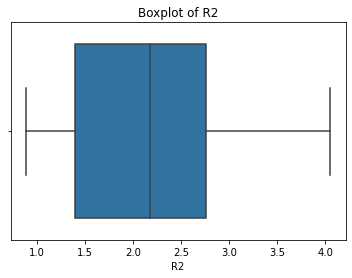

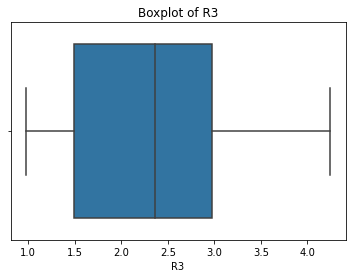

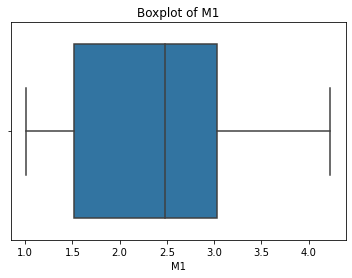

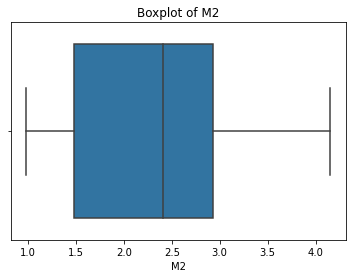

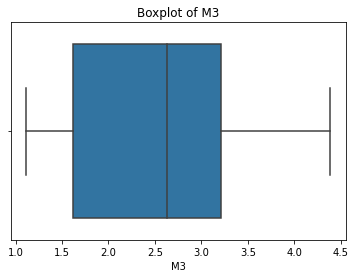

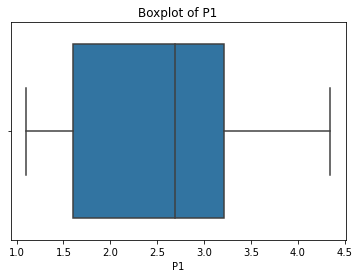

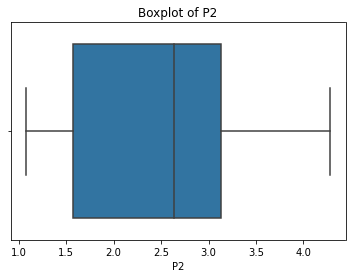

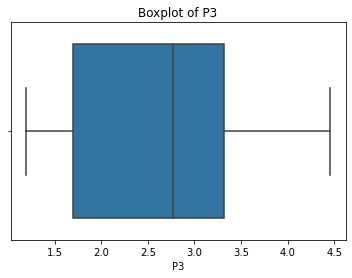

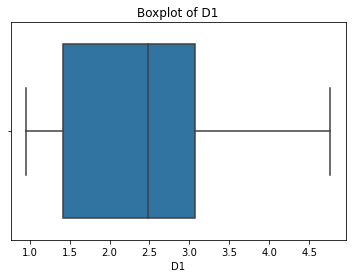

In [13]:
for col in data.columns:
    plt.title(f'Boxplot of {col}')
    sns.boxplot(data[col])
    plt.show()

**there are no outliars in the data**

**Feature Correlation**

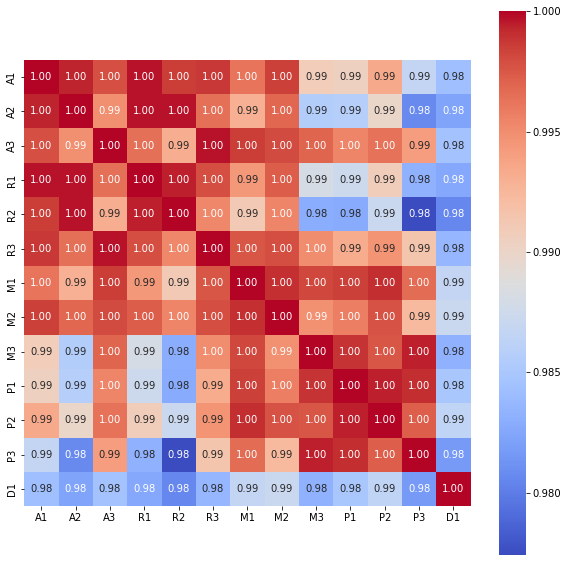

In [14]:
corr = data.corr()
plt.figure(figsize = (10, 10))
sns.heatmap(corr, annot = True, cmap = 'coolwarm', square = True, fmt = '.2f')
plt.show()

**scaling the data**

In [15]:
from sklearn.preprocessing import RobustScaler, MinMaxScaler

In [16]:
robust = RobustScaler()
minmax = MinMaxScaler()

In [17]:
for col in data.columns:
  data[col] = robust.fit_transform(data[col].values.reshape(-1,1))
  data[col] = minmax.fit_transform(data[col].values.reshape(-1,1))

# SPLITTING DATA INTO TRAINING AND TESTING SETS

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X, y = data.drop('D1', axis = 1), data['D1']

In [20]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

# **SPLITTING TRAINING DATA**

In [21]:
x_train_, x_val, y_train_, y_val = train_test_split(x_train, y_train, test_size = 0.2, random_state = 123)

# **Model selection**

In [22]:
from sklearn.ensemble import ExtraTreesRegressor, GradientBoostingRegressor, RandomForestRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.tree import DecisionTreeRegressor
from catboost import CatBoostRegressor
from sklearn.linear_model import SGDRegressor, LinearRegression, Lasso, RidgeCV, ElasticNet

In [23]:
from sklearn.metrics import mean_squared_error, r2_score

In [24]:
def model_selection(x_train_, x_val, y_train_, y_val, model):
  model = model()
  model.fit(x_train_, y_train_)

  pred = model.predict(x_val)

  error = np.sqrt(mean_squared_error(y_val, pred))
  acc = r2_score(y_val, pred)
  train_score = model.score(x_train_, y_train_)
  val_score = model.score(x_val, y_val)

  print('Error:', error*100)
  print('\n')
  print('ACC :', acc*100)
  print('\n')
  print('Train Score:', train_score*100)
  print('\n')
  print('Val Score:', val_score*100)
  print('\n')
  print('Is overfitting:', True if train_score>val_score else False)
  print('\n')
  print('Overfitting by:',train_score*100-val_score*100)

In [25]:
extratrees = model_selection(x_train_, x_val, y_train_, y_val, ExtraTreesRegressor)
extratrees

Error: 3.3291156527170283


ACC : 98.43235655054404


Train Score: 100.0


Val Score: 98.43235655054404


Is overfitting: True


Overfitting by: 1.5676434494559572


In [26]:
gradient = model_selection(x_train_, x_val, y_train_, y_val, GradientBoostingRegressor)
gradient

Error: 3.161727389089282


ACC : 98.58603594419412


Train Score: 99.19905903289664


Val Score: 98.58603594419412


Is overfitting: True


Overfitting by: 0.6130230887025192


In [27]:
randomforest = model_selection(x_train_, x_val, y_train_, y_val, RandomForestRegressor)
randomforest

Error: 3.252504398298204


ACC : 98.50367713730233


Train Score: 99.71339766419159


Val Score: 98.50367713730233


Is overfitting: True


Overfitting by: 1.2097205268892566


In [28]:
ada = model_selection(x_train_, x_val, y_train_, y_val, AdaBoostRegressor)
ada

Error: 3.9688258602418127


ACC : 97.77200806561915


Train Score: 97.5747526889961


Val Score: 97.77200806561915


Is overfitting: False


Overfitting by: -0.1972553766230476


In [29]:
xgb = model_selection(x_train_, x_val, y_train_, y_val, XGBRegressor)
xgb

Error: 3.222337027244336


ACC : 98.53130556232422


Train Score: 99.98295881540336


Val Score: 98.53130556232422


Is overfitting: True


Overfitting by: 1.4516532530791437


In [30]:
catboost = model_selection(x_train_, x_val, y_train_, y_val, CatBoostRegressor)
catboost

Learning rate set to 0.040052
0:	learn: 0.2512156	total: 159ms	remaining: 2m 39s
1:	learn: 0.2420547	total: 162ms	remaining: 1m 20s
2:	learn: 0.2330864	total: 163ms	remaining: 54.2s
3:	learn: 0.2246345	total: 165ms	remaining: 41s
4:	learn: 0.2164421	total: 167ms	remaining: 33.1s
5:	learn: 0.2085910	total: 168ms	remaining: 27.9s
6:	learn: 0.2010549	total: 170ms	remaining: 24.1s
7:	learn: 0.1937012	total: 171ms	remaining: 21.2s
8:	learn: 0.1867643	total: 173ms	remaining: 19s
9:	learn: 0.1799430	total: 174ms	remaining: 17.3s
10:	learn: 0.1737769	total: 176ms	remaining: 15.8s
11:	learn: 0.1677199	total: 178ms	remaining: 14.6s
12:	learn: 0.1617397	total: 179ms	remaining: 13.6s
13:	learn: 0.1560608	total: 181ms	remaining: 12.7s
14:	learn: 0.1506249	total: 183ms	remaining: 12s
15:	learn: 0.1453740	total: 185ms	remaining: 11.4s
16:	learn: 0.1404388	total: 187ms	remaining: 10.8s
17:	learn: 0.1356473	total: 189ms	remaining: 10.3s
18:	learn: 0.1312960	total: 190ms	remaining: 9.83s
19:	learn: 0.12

220:	learn: 0.0336083	total: 495ms	remaining: 1.75s
221:	learn: 0.0335974	total: 497ms	remaining: 1.74s
222:	learn: 0.0335861	total: 498ms	remaining: 1.74s
223:	learn: 0.0335718	total: 500ms	remaining: 1.73s
224:	learn: 0.0335577	total: 501ms	remaining: 1.73s
225:	learn: 0.0335479	total: 503ms	remaining: 1.72s
226:	learn: 0.0334814	total: 504ms	remaining: 1.72s
227:	learn: 0.0334625	total: 506ms	remaining: 1.71s
228:	learn: 0.0333980	total: 507ms	remaining: 1.71s
229:	learn: 0.0333493	total: 509ms	remaining: 1.7s
230:	learn: 0.0333263	total: 511ms	remaining: 1.7s
231:	learn: 0.0333169	total: 512ms	remaining: 1.69s
232:	learn: 0.0332596	total: 514ms	remaining: 1.69s
233:	learn: 0.0332470	total: 515ms	remaining: 1.69s
234:	learn: 0.0332400	total: 517ms	remaining: 1.68s
235:	learn: 0.0332213	total: 518ms	remaining: 1.68s
236:	learn: 0.0332131	total: 521ms	remaining: 1.68s
237:	learn: 0.0331578	total: 522ms	remaining: 1.67s
238:	learn: 0.0331557	total: 525ms	remaining: 1.67s
239:	learn: 0.

404:	learn: 0.0284555	total: 836ms	remaining: 1.23s
405:	learn: 0.0284058	total: 838ms	remaining: 1.23s
406:	learn: 0.0284047	total: 840ms	remaining: 1.22s
407:	learn: 0.0283690	total: 842ms	remaining: 1.22s
408:	learn: 0.0283567	total: 844ms	remaining: 1.22s
409:	learn: 0.0283211	total: 846ms	remaining: 1.22s
410:	learn: 0.0283120	total: 848ms	remaining: 1.22s
411:	learn: 0.0282684	total: 851ms	remaining: 1.21s
412:	learn: 0.0282280	total: 853ms	remaining: 1.21s
413:	learn: 0.0282061	total: 855ms	remaining: 1.21s
414:	learn: 0.0281980	total: 857ms	remaining: 1.21s
415:	learn: 0.0281619	total: 859ms	remaining: 1.21s
416:	learn: 0.0281610	total: 861ms	remaining: 1.2s
417:	learn: 0.0281201	total: 863ms	remaining: 1.2s
418:	learn: 0.0281126	total: 866ms	remaining: 1.2s
419:	learn: 0.0280858	total: 869ms	remaining: 1.2s
420:	learn: 0.0280848	total: 871ms	remaining: 1.2s
421:	learn: 0.0280803	total: 873ms	remaining: 1.2s
422:	learn: 0.0280417	total: 875ms	remaining: 1.19s
423:	learn: 0.0280

587:	learn: 0.0243236	total: 1.18s	remaining: 826ms
588:	learn: 0.0243165	total: 1.18s	remaining: 824ms
589:	learn: 0.0242960	total: 1.18s	remaining: 822ms
590:	learn: 0.0242942	total: 1.18s	remaining: 819ms
591:	learn: 0.0242623	total: 1.19s	remaining: 817ms
592:	learn: 0.0242314	total: 1.19s	remaining: 814ms
593:	learn: 0.0242094	total: 1.19s	remaining: 812ms
594:	learn: 0.0241878	total: 1.19s	remaining: 810ms
595:	learn: 0.0241751	total: 1.19s	remaining: 807ms
596:	learn: 0.0241480	total: 1.19s	remaining: 805ms
597:	learn: 0.0241411	total: 1.19s	remaining: 803ms
598:	learn: 0.0241384	total: 1.2s	remaining: 800ms
599:	learn: 0.0241059	total: 1.2s	remaining: 798ms
600:	learn: 0.0241036	total: 1.2s	remaining: 795ms
601:	learn: 0.0240539	total: 1.2s	remaining: 793ms
602:	learn: 0.0240471	total: 1.2s	remaining: 791ms
603:	learn: 0.0240208	total: 1.2s	remaining: 789ms
604:	learn: 0.0239970	total: 1.21s	remaining: 787ms
605:	learn: 0.0239911	total: 1.21s	remaining: 785ms
606:	learn: 0.0239

821:	learn: 0.0205076	total: 1.53s	remaining: 331ms
822:	learn: 0.0204952	total: 1.53s	remaining: 329ms
823:	learn: 0.0204709	total: 1.53s	remaining: 327ms
824:	learn: 0.0204697	total: 1.53s	remaining: 325ms
825:	learn: 0.0204682	total: 1.53s	remaining: 323ms
826:	learn: 0.0204649	total: 1.54s	remaining: 321ms
827:	learn: 0.0204432	total: 1.54s	remaining: 319ms
828:	learn: 0.0204278	total: 1.54s	remaining: 318ms
829:	learn: 0.0203847	total: 1.54s	remaining: 316ms
830:	learn: 0.0203730	total: 1.54s	remaining: 314ms
831:	learn: 0.0203490	total: 1.54s	remaining: 312ms
832:	learn: 0.0203353	total: 1.54s	remaining: 310ms
833:	learn: 0.0203201	total: 1.55s	remaining: 308ms
834:	learn: 0.0202993	total: 1.55s	remaining: 306ms
835:	learn: 0.0202725	total: 1.55s	remaining: 304ms
836:	learn: 0.0202547	total: 1.55s	remaining: 302ms
837:	learn: 0.0202532	total: 1.55s	remaining: 300ms
838:	learn: 0.0202394	total: 1.55s	remaining: 298ms
839:	learn: 0.0202379	total: 1.55s	remaining: 296ms
840:	learn: 

In [31]:
sgd = model_selection(x_train_, x_val, y_train_, y_val, SGDRegressor)
sgd

Error: 4.336520210793275


ACC : 97.3400573305678


Train Score: 97.18266980453978


Val Score: 97.3400573305678


Is overfitting: False


Overfitting by: -0.15738752602801753


In [32]:
linear = model_selection(x_train_, x_val, y_train_, y_val, LinearRegression)
linear

Error: 3.847276170688189


ACC : 97.90638774501255


Train Score: 97.67064736104437


Val Score: 97.90638774501255


Is overfitting: False


Overfitting by: -0.23574038396817798


In [33]:
lasso = model_selection(x_train_, x_val, y_train_, y_val, Lasso)
lasso

Error: 26.655669851671526


ACC : -0.500617020619476


Train Score: 0.0


Val Score: -0.500617020619476


Is overfitting: True


Overfitting by: 0.500617020619476


In [34]:
net = model_selection(x_train_, x_val, y_train_, y_val, ElasticNet)
net

Error: 26.655669851671526


ACC : -0.500617020619476


Train Score: 0.0


Val Score: -0.500617020619476


Is overfitting: True


Overfitting by: 0.500617020619476


In [35]:
ridge = model_selection(x_train_, x_val, y_train_, y_val, RidgeCV)
ridge

Error: 4.1004000347362455


ACC : 97.62183499737588


Train Score: 97.50960913419962


Val Score: 97.62183499737588


Is overfitting: False


Overfitting by: -0.11222586317626337


**I will use Linear Regression**

# Model building and training

In [36]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

# Predictions

In [37]:
pred = model.predict(x_test)
pred

array([ 4.84539192e-01,  5.77648901e-01,  7.43489661e-01,  7.40022619e-01,
        5.57818312e-01,  1.09335029e-01,  2.55392516e-01,  8.06265953e-01,
        2.27931062e-01,  4.63590700e-01,  1.40191489e-01,  1.08591203e-01,
        6.47216357e-01,  5.34685813e-01,  7.04152850e-02,  5.51132432e-01,
        5.90892089e-01,  4.64393781e-02,  4.97738979e-01,  5.18886127e-01,
        5.39608453e-02,  2.45543882e-01,  6.13893089e-01,  6.14975566e-01,
        8.23081185e-01,  6.01838125e-01,  3.45824590e-01,  4.08758658e-01,
        3.95420753e-02,  2.58508767e-01,  1.17215103e-01,  8.94403276e-02,
        5.48862684e-01,  5.83511296e-02,  4.91568528e-01,  2.96581181e-01,
        1.38685358e-01,  5.42139490e-02,  4.31388597e-01,  2.73353194e-01,
        7.41601018e-01,  3.85548094e-01,  9.20182349e-01,  1.40933906e-01,
        5.33225044e-01,  2.61860808e-01,  8.29128627e-01,  1.75682270e-01,
        1.31472962e-01,  8.32696482e-01,  4.23214743e-01,  2.83255510e-02,
        7.70003922e-01,  

# Metric check

**mean squared error**

In [38]:
error = np.sqrt(mean_squared_error(y_test, pred))
error*100

4.096015241654349

**r2 score**

In [39]:
acc = r2_score(y_test, pred)
acc*100

97.55878447003485

**overfitting rate**

In [40]:
overfitting_by = model.score(x_train, y_train)*100 - model.score(x_test, y_test)*100
overfitting_by

0.17382455895955218

**The model is not overfitting at all**